In [191]:
import pandas as pd
import pandas_datareader as pdr
import FinanceDataReader as fdr
import numpy as np

Dubai / 동 / 선박운임료 / 석탄의 경우 Bloomberg Terminal 활용하여 확보
코로나 관련 데이터는 깃허브의 csv파일로 확보
S&P Energy 가격은 Investing.com을 통해 csv파일로 확보하였다.
그 외의 데이터는 Pandas_datareader 와 FinanceDataReader를 통해 확보하였다.

# 데이터 합치기 및 확인(+EDA)

데이터 별 특징 정리:

2020년 코로나 데이터를 포함하는 데이터 = 코로나 / 비트코인

In [192]:
df_2020 = pd.read_csv('data/df_2020.csv')
df_2020.Date = pd.to_datetime(df_2020.Date)
df_2020

,Date,WTI,Brent,Gas,Gold,Copper,Bdiy,new_cases,vaccination,Dollar,Bitcoin,Snp,Open,High,Low,Volume,Energy
0,2020-01-02,61.17,67.05,2.122,1520.55,6188.0,976.0,0.0,0.0,96.525,6967.0,3257.85,456.46,460.93,456.46,133.61,460.34
1,2020-01-03,63.00,69.08,2.130,1547.40,6129.5,907.0,0.0,0.0,96.521,7343.1,3234.85,460.34,465.54,456.81,171.55,458.77
2,2020-01-06,63.27,70.25,2.135,1576.85,6138.5,844.0,0.0,0.0,96.350,7759.1,3246.28,458.77,464.81,458.77,195.33,462.34
3,2020-01-07,62.70,68.74,2.162,1566.50,6149.0,791.0,0.0,0.0,96.702,8155.7,3237.18,462.34,462.34,455.75,197.25,461.39
4,2020-01-08,59.65,67.31,2.141,1582.85,6178.0,773.0,0.0,0.0,96.996,8059.6,3253.05,461.39,461.39,452.84,187.23,453.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2021-10-14,81.43,83.86,5.687,1797.15,9984.0,5062.0,1407791.0,63331126.0,93.961,57345.8,4438.23,427.19,433.94,427.19,167.51,432.43
437,2021-10-15,82.39,84.67,5.410,1781.45,10281.0,4854.0,1458486.0,68354252.0,93.938,61672.5,4471.37,432.43,438.73,432.43,173.94,434.44
438,2021-10-18,82.62,84.13,4.989,1762.45,10196.0,4732.0,1339231.0,69279898.0,93.945,62056.3,4486.48,434.44,441.08,432.57,217.66,434.89
439,2021-10-19,83.19,85.02,5.088,1779.40,10149.5,4714.0,1419351.0,79280514.0,93.728,64278.5,4519.63,434.89,441.40,434.47,175.70,439.87


## EDA 및 시각화

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df_hm2=df_2020.drop(['Open','High', 'Low'],axis=1)
df_hm2.head()
df_hm2_corr = df_hm2.corr()
df_hm2_corr

,WTI,Brent,Gas,Gold,Copper,Bdiy,new_cases,vaccination,Dollar,Bitcoin,Snp,Volume,Energy
WTI,1.000000,0.984433,0.745503,0.082865,0.869105,0.780071,0.532558,0.763553,-0.619955,0.779901,0.902560,-0.585771,0.814355
Brent,0.984433,1.000000,0.734564,0.047469,0.861840,0.768435,0.515337,0.753807,-0.606086,0.777471,0.899252,-0.597893,0.849026
Gas,0.745503,0.734564,1.000000,0.229528,0.758351,0.905673,0.580421,0.722840,-0.495727,0.681087,0.832766,-0.363991,0.445904
Gold,0.082865,0.047469,0.229528,1.000000,0.324910,0.246209,0.496333,0.102934,-0.664483,0.121812,0.320992,-0.238186,-0.309111
Copper,0.869105,0.861840,0.758351,0.324910,1.000000,0.823721,0.784903,0.819451,-0.803671,0.900127,0.956149,-0.499724,0.603437
Bdiy,0.780071,0.768435,0.905673,0.246209,0.823721,1.000000,0.590796,0.814953,-0.502319,0.743473,0.854910,-0.414132,0.491437
new_cases,0.532558,0.515337,0.580421,0.496333,0.784903,0.590796,1.000000,0.519085,-0.806197,0.737872,0.758695,-0.360164,0.170053
vaccination,0.763553,0.753807,0.722840,0.102934,0.819451,0.814953,0.519085,1.000000,-0.449064,0.683180,0.828389,-0.400834,0.595167
Dollar,-0.619955,-0.606086,-0.495727,-0.664483,-0.803671,-0.502319,-0.806197,-0.449064,1.000000,-0.657765,-0.759431,0.430750,-0.268707
Bitcoin,0.779901,0.777471,0.681087,0.121812,0.900127,0.743473,0.737872,0.683180,-0.657765,1.000000,0.853450,-0.396084,0.586202


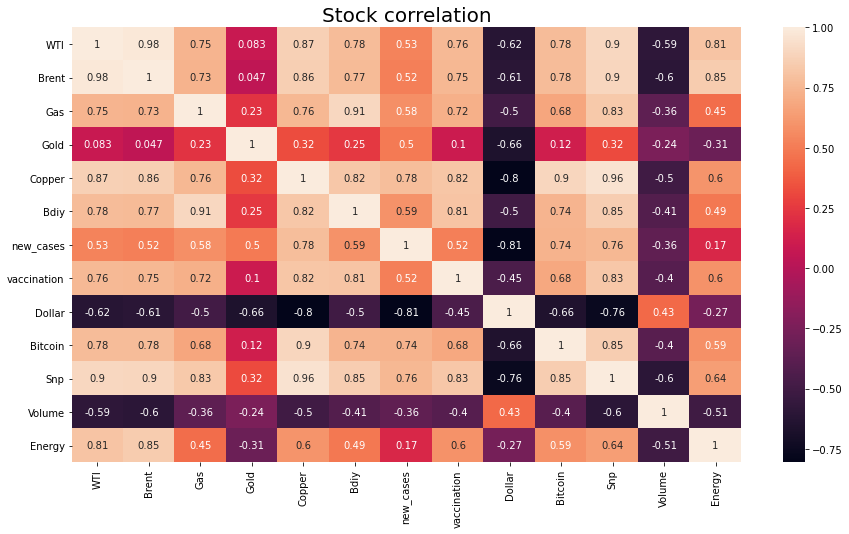

In [195]:
plt.figure(figsize = (15,8))
sns.heatmap(df_hm2_corr, annot=True)
plt.title('Stock correlation', fontsize=20)
plt.show()

In [196]:
X = df_hm2.iloc[:,1:-1]  # volume 값의 경우 2019년 이후로 작성되지 않아 여기선 미반영 하겠다
y = df_2020['Energy']

In [197]:
import statsmodels.api as sm
model = sm.OLS(y,X)

res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Energy   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              9468.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:34:25   Log-Likelihood:                         -1959.4
No. Observations:                 441   AIC:                                      3943.
Df Residuals:                     429   BIC:                                      3992.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
WTI            -0.6376      0.352     -1.811      0.071      -1.329       0.054
Brent           3.4791      0.398      8.750      0.000       2.698       4.261
Gas           -15.6673      2.881     -5.437      0.000     -21.331     -10.004
Gold           -0.1541      0.016     -9.694      0.000      -0.185      -0.123
Copper          0.0080      0.003      2.417      0.016       0.001       0.015
Bdiy           -0.0094      0.002     -3.774      0.000      -0.014      -0.004
new_cases   -2.714e-05   2.96e-06     -9.182      0.000    -3.3e-05   -2.13e-05
vaccination -7.301e-08   5.82e-08     -1.255      0.210   -1.87e-07    4.14e-08
Dollar          2.5634      0.216     11.871      0.000       2.139       2.988
Bitcoin      7.053e-05      0.000      0.419      0.676      -0.000       0.000
Snp             0.0679      0.012      5.697      0.000       0.044       0.091
Volume         -0.0252      0.015     -1.714      0.087      -0.054       0.004
==============================================================================
Omnibus:                        2.937   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                3.217
Skew:                          -0.034   Prob(JB):                        0.200
Kurtosis:                       3.413   Cond. No.                     1.64e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Feature Selection
- 과도한 상관관계 / 또는 높은 설명력을 가진 변수의 경우 제외하기로 결정하였다
    Crewd Oil 값은 우선 제거하여 돌려보기로 하였다.(이 값은 조금 생각해 보고)
- Copper의 경우 회귀분석에 있어서 너무 높은 pvalue를 보여 우선적으로 탈락

In [198]:
X2 = df_2020.drop(['Date','Brent','Copper'], axis =1)
y2 = df_2020['Energy']

Train/Test Split

## 2020년의 경우

In [199]:
train2020 = df_2020.loc[df_2020.Date < '2021-07-31',:]
test2020 = df_2020.loc[df_2020.Date >= '2021-07-31',:]
X2_train = np.array(train2020.drop(['Date','Brent','Energy'],axis =1))
y2_train = np.array(train2020.Energy)
X2_test = np.array(test2020.drop(['Date','Brent','Energy'],axis =1))
y2_test = np.array(test2020.Energy)


In [200]:
X2_test.shape

(56, 14)

# LSTM

In [201]:
from sklearn.preprocessing import MinMaxScaler
def Scaler(X,y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X)
    trainX = scaler.transform(X)
    y = np.reshape(y ,(-1,1)) # 스케일러에 들어가려면 reshape이 필요함
    scaler = scaler.fit(y)
    trainy = scaler.transform(y)
    # LSTM 을 위한 reshape
    tX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
    ty = trainy
    return tX, ty, scaler

In [202]:
tX2_train, ty2_train, scaler3 = Scaler(X2_train, y2_train)

In [203]:
tX2_test, ty2_test, scaler4 = Scaler(X2_test, y2_test)

3개의 train 구분에 대하여 각각의 모델 적용 하는 함수를 작성해야 한다.

In [204]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN , LSTM , GRU , Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#LSTM 모델 만드는 과정
def model_build(x,y):
    tf.random.set_seed(1)
    model = Sequential()
    model.add(LSTM(16, 
                   input_shape=(x,y), 
                   activation='tanh', 
                   return_sequences=True)
              )
    model.add(LSTM(16, activation = 'tanh',return_sequences=True))
    model.add(LSTM(16, activation = 'tanh',return_sequences=True))
    model.add(LSTM(16, activation = 'tanh'))
    model.add(Dense(1))

    model.summary()
    return model
# LSTM 모델 학습 코드(model_build포함)
def Train(xtrain,ytrain,xtest,ytest,number):
    model = model_build(xtrain.shape[1],xtrain.shape[2])
    model.compile(loss='mae' , optimizer='adam')
    earlyStopping = EarlyStopping(min_delta=0.001, monitor = 'loss', patience = 100, restore_best_weights = True)
    modelCheckPoint = ModelCheckpoint(filepath = f'best_model_{number}.h5', monitor = 'val_loss')
    
    hist = model.fit(xtrain, ytrain ,epochs=1000,validation_data=(xtest,ytest ), batch_size = 100, callbacks = [earlyStopping, modelCheckPoint] )
    
    #graph
    yhat = model.predict(xtest)
    print(f'mse evaluate : {np.average(yhat-ytest)}')
    print(yhat.shape,ytest.shape)

    plt.plot(yhat, label="LSTM")
    plt.plot(ytest, label="real")
    plt.legend()
    return yhat, ytest

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 14, 16)            1152      
_________________________________________________________________
lstm_89 (LSTM)               (None, 14, 16)            2112      
_________________________________________________________________
lstm_90 (LSTM)               (None, 14, 16)            2112      
_________________________________________________________________
lstm_91 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 3s 212ms/step - loss: 0.4761 - val_loss: 0.3472
Epoch 2/1000
4/4 

Epoch 73/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0367 - val_loss: 0.1207
Epoch 74/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0403 - val_loss: 0.1232
Epoch 75/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0354 - val_loss: 0.1175
Epoch 76/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0362 - val_loss: 0.1127
Epoch 77/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0345 - val_loss: 0.1142
Epoch 78/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0328 - val_loss: 0.1168
Epoch 79/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0330 - val_loss: 0.1062
Epoch 80/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0319 - val_loss: 0.1026
Epoch 81/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0303 - val_loss: 0.0987
Epoch 82/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0303 - val_loss: 0.1004


4/4 [==============================] - 0s 14ms/step - loss: 0.0211 - val_loss: 0.0503
Epoch 155/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0194 - val_loss: 0.0566
Epoch 156/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0220 - val_loss: 0.0534
Epoch 157/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0213 - val_loss: 0.0504
Epoch 158/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0205 - val_loss: 0.0506
Epoch 159/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0210 - val_loss: 0.0497
Epoch 160/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0201 - val_loss: 0.0539
Epoch 161/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0198 - val_loss: 0.0495
Epoch 162/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0207 - val_loss: 0.0492
Epoch 163/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0200 - val_loss: 0.0495
Epoch

4/4 [==============================] - 0s 15ms/step - loss: 0.0177 - val_loss: 0.0489
Epoch 236/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0175 - val_loss: 0.0499
Epoch 237/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0181 - val_loss: 0.0527
Epoch 238/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0187 - val_loss: 0.0518
Epoch 239/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0177 - val_loss: 0.0514
Epoch 240/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0499
Epoch 241/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0175 - val_loss: 0.0509
Epoch 242/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0177 - val_loss: 0.0499
Epoch 243/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0493
Epoch 244/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0180 - val_loss: 0.0507
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 0.0174 - val_loss: 0.0498
Epoch 317/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0194 - val_loss: 0.0500
Epoch 318/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0175 - val_loss: 0.0524
mse evaluate : 0.017345946429856603
(56, 1) (56, 1)


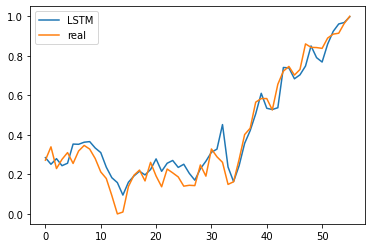

In [205]:
yhat, ytest =Train(tX2_train, ty2_train, tX2_test,ty2_test,4)

In [206]:
#inverse scaler
scaler4.inverse_transform(yhat)

array([[371.60434],
       [368.2455 ],
       [371.08963],
       [367.5254 ],
       [368.76932],
       [378.5106 ],
       [378.40277],
       [379.458  ],
       [379.76532],
       [376.51163],
       [374.1819 ],
       [366.76035],
       [361.41293],
       [358.92166],
       [352.57306],
       [359.10312],
       [362.29272],
       [364.6976 ],
       [362.82562],
       [365.57498],
       [370.9706 ],
       [364.6507 ],
       [368.76028],
       [370.17755],
       [366.64328],
       [368.25052],
       [363.62964],
       [360.13043],
       [365.9374 ],
       [369.79745],
       [374.3693 ],
       [375.94443],
       [388.42358],
       [366.85825],
       [359.42804],
       [367.518  ],
       [378.88394],
       [385.3596 ],
       [393.91278],
       [404.3361 ],
       [396.7207 ],
       [396.08945],
       [396.99942],
       [417.4626 ],
       [417.26245],
       [411.719  ],
       [413.7372 ],
       [418.20517],
       [428.42502],
       [422.4674 ],


# S&P500 Energy 섹터 소속 5개 회사

In [207]:
### ExxonMobil 불러오기

df_XOM = fdr.DataReader('XOM', '2020-01-01', '2021-10-21')
df_XOM

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,70.90,70.24,71.02,70.24,12410000.0,0.0161
2020-01-03,70.33,71.34,71.37,70.16,17390000.0,-0.0080
2020-01-06,70.87,70.32,71.36,70.23,20080000.0,0.0077
2020-01-07,70.29,70.50,70.52,69.51,17500000.0,-0.0082
2020-01-08,69.23,70.11,70.28,69.17,15140000.0,-0.0151
...,...,...,...,...,...,...
2021-10-15,62.59,62.73,63.07,62.44,16090000.0,0.0095
2021-10-18,62.56,63.09,63.14,62.27,18270000.0,-0.0005
2021-10-19,63.50,62.87,63.61,62.67,18930000.0,0.0150


In [208]:
### Chevron Corporation 불러오기

df_CVX = fdr.DataReader('CVX', '2020-01-01', '2021-10-21')
df_CVX

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,121.43,120.81,121.62,120.77,5210000.0,0.0076
2020-01-03,121.01,121.78,122.72,120.74,6360000.0,-0.0035
2020-01-06,120.60,121.24,121.67,120.33,9950000.0,-0.0034
2020-01-07,119.06,119.02,119.73,117.77,7880000.0,-0.0128
2020-01-08,117.70,118.55,119.09,117.65,7300000.0,-0.0114
...,...,...,...,...,...,...
2021-10-15,109.61,109.77,110.03,109.43,9970000.0,0.0074
2021-10-18,109.56,110.22,110.41,108.96,10500000.0,-0.0005
2021-10-19,111.70,110.16,111.70,109.79,10360000.0,0.0195


In [209]:
### ConocoPhillips 불러오기

df_COP = fdr.DataReader('COP', '2020-01-01', '2021-10-21')
df_COP

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,65.46,65.28,65.68,64.85,4120000.0,0.0066
2020-01-03,65.70,67.04,67.13,65.07,6330000.0,0.0037
2020-01-06,66.48,66.28,66.94,65.88,8830000.0,0.0119
2020-01-07,66.48,66.44,66.49,65.74,5980000.0,0.0000
2020-01-08,64.94,66.45,66.63,64.52,6470000.0,-0.0232
...,...,...,...,...,...,...
2021-10-15,74.14,74.63,74.93,74.13,6950000.0,0.0039
2021-10-18,74.50,74.77,75.75,74.13,9910000.0,0.0049
2021-10-19,75.32,74.84,75.85,74.38,6590000.0,0.0110


In [210]:
### Devon Energy 불러오기

df_DVN = fdr.DataReader('DVN', '2020-01-01', '2021-10-21')
df_DVN

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,24.86,25.27,25.34,24.71,5050000.0,-0.0072
2020-01-03,25.16,25.55,25.58,24.99,6980000.0,0.0121
2020-01-06,25.46,25.38,25.60,25.15,4390000.0,0.0119
2020-01-07,25.54,25.31,25.62,25.16,6460000.0,0.0031
2020-01-08,24.63,25.50,25.54,24.30,8230000.0,-0.0356
...,...,...,...,...,...,...
2021-10-15,40.10,40.25,40.98,40.03,7740000.0,0.0080
2021-10-18,40.52,40.67,41.98,39.88,11510000.0,0.0105
2021-10-19,40.30,40.64,41.81,40.11,16070000.0,-0.0054


In [211]:
### Marathon Oil 불러오기

df_MRO = fdr.DataReader('MRO', '2020-01-01', '2021-10-21')
df_MRO

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,13.68,13.69,13.75,13.55,10130000.0,0.0074
2020-01-03,13.75,14.05,14.07,13.60,14860000.0,0.0051
2020-01-06,13.96,13.84,14.01,13.74,12020000.0,0.0153
2020-01-07,13.79,13.76,13.84,13.61,9620000.0,-0.0122
2020-01-08,13.28,13.80,13.82,13.02,15600000.0,-0.0370
...,...,...,...,...,...,...
2021-10-15,16.18,16.42,16.53,16.16,12690000.0,0.0025
2021-10-18,16.43,16.48,16.84,16.24,25240000.0,0.0155
2021-10-19,16.39,16.46,16.62,16.27,18510000.0,-0.0024


## 데이터 셋 합본

In [212]:
df_raw = df_2020.drop(['Open','High','Low','Volume','Energy'],axis = 1)
df_raw = df_raw.set_index(df_2020.Date) 

In [213]:
KMI_df = df_raw.merge(df_KMI, how = 'inner',left_on=df_raw.Date,right_index=True)
KMI_df = KMI_df.drop(['key_0','Date'],axis=1)
XOM_df = df_raw.merge(df_XOM, how = 'inner',left_on=df_raw.Date,right_index=True)
XOM_df = XOM_df.drop(['key_0','Date'],axis=1)
CVX_df = df_raw.merge(df_CVX, how = 'inner',left_on=df_raw.Date,right_index=True)
CVX_df = CVX_df.drop(['key_0','Date'],axis=1)
COP_df = df_raw.merge(df_COP, how = 'inner',left_on=df_raw.Date,right_index=True)
COP_df = COP_df.drop(['key_0','Date'],axis=1)
DVC_df = df_raw.merge(df_DVC, how = 'inner',left_on=df_raw.Date,right_index=True)
DVC_df = DVC_df.drop(['key_0','Date'],axis=1)

## LSTM 개별 주식 돌려보기

In [214]:
def LSTM_indiv(df,ticker):
    train = df.loc[df.index < '2021-07-31',:]
    test = df.loc[df.index >= '2021-07-31',:]
    X_train = np.array(train.drop(['Brent','Copper','Close','Change'],axis =1))
    y_train = np.array(train.Close)
    X_test = np.array(test.drop(['Brent','Copper','Close','Change'],axis =1))
    y_test = np.array(test.Close)
    tX_train, ty_train, scaler1 = Scaler(X_train, y_train)
    tX_test, ty_test, scaler2 = Scaler(X_test, y_test)
    yhat, ytest =Train(tX_train, ty_train, tX_test,ty_test,ticker)
    return yhat, ytest, scaler2

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 13, 16)            1152      
_________________________________________________________________
lstm_93 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_94 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_95 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 4s 221ms/step - loss: 0.4609 - val_loss: 0.3322
Epoch 2/1000
4/4 

Epoch 73/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0432 - val_loss: 0.1229
Epoch 74/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0435 - val_loss: 0.1380
Epoch 75/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0417 - val_loss: 0.1039
Epoch 76/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0470 - val_loss: 0.1505
Epoch 77/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0437 - val_loss: 0.1129
Epoch 78/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0395 - val_loss: 0.1186
Epoch 79/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0397 - val_loss: 0.1217
Epoch 80/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0401 - val_loss: 0.1047
Epoch 81/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0390 - val_loss: 0.1063
Epoch 82/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0396 - val_loss: 0.1162


4/4 [==============================] - 0s 14ms/step - loss: 0.0254 - val_loss: 0.0479
Epoch 155/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0250 - val_loss: 0.0557
Epoch 156/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0275 - val_loss: 0.0486
Epoch 157/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0245 - val_loss: 0.0476
Epoch 158/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0245 - val_loss: 0.0472
Epoch 159/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0272 - val_loss: 0.0486
Epoch 160/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0256 - val_loss: 0.0540
Epoch 161/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0262 - val_loss: 0.0478
Epoch 162/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0259 - val_loss: 0.0473
Epoch 163/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0256 - val_loss: 0.0474
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 0.0217 - val_loss: 0.0456
Epoch 236/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0220 - val_loss: 0.0484
Epoch 237/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0232 - val_loss: 0.0505
Epoch 238/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0215 - val_loss: 0.0468
Epoch 239/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0212 - val_loss: 0.0458
Epoch 240/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0207 - val_loss: 0.0463
Epoch 241/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0208 - val_loss: 0.0486
Epoch 242/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0205 - val_loss: 0.0484
Epoch 243/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0460
Epoch 244/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0209 - val_loss: 0.0459
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 0.0178 - val_loss: 0.0490
Epoch 317/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0182 - val_loss: 0.0477
Epoch 318/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0191 - val_loss: 0.0481
Epoch 319/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0191 - val_loss: 0.0483
Epoch 320/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0200 - val_loss: 0.0489
Epoch 321/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0183 - val_loss: 0.0497
Epoch 322/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0179 - val_loss: 0.0491
Epoch 323/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0182 - val_loss: 0.0469
Epoch 324/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0181 - val_loss: 0.0491
Epoch 325/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0203 - val_loss: 0.0507
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 0.0174 - val_loss: 0.0498
Epoch 398/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0173 - val_loss: 0.0487
Epoch 399/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0477
Epoch 400/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0504
Epoch 401/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0200 - val_loss: 0.0492
Epoch 402/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0176 - val_loss: 0.0490
Epoch 403/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0171 - val_loss: 0.0491
Epoch 404/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0179 - val_loss: 0.0495
Epoch 405/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0199 - val_loss: 0.0506
Epoch 406/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0194 - val_loss: 0.0490
mse e

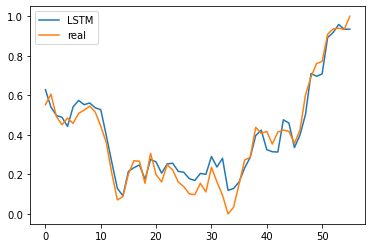

In [215]:
yhat1, ytest1, scaler1 = LSTM_indiv(KMI_df,"KMI")

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 13, 16)            1152      
_________________________________________________________________
lstm_97 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_98 (LSTM)               (None, 13, 16)            2112      
_________________________________________________________________
lstm_99 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 3s 213ms/step - loss: 0.4237 - val_loss: 0.3721
Epoch 2/1000
4/4 

Epoch 73/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0378 - val_loss: 0.1074
Epoch 74/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0382 - val_loss: 0.1161
Epoch 75/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0368 - val_loss: 0.1011
Epoch 76/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0373 - val_loss: 0.1132
Epoch 77/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0361 - val_loss: 0.1026
Epoch 78/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0343 - val_loss: 0.0992
Epoch 79/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0333 - val_loss: 0.0971
Epoch 80/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0344 - val_loss: 0.1073
Epoch 81/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0358 - val_loss: 0.0928
Epoch 82/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0337 - val_loss: 0.0952


4/4 [==============================] - 0s 14ms/step - loss: 0.0228 - val_loss: 0.0515
Epoch 155/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0220 - val_loss: 0.0570
Epoch 156/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0250 - val_loss: 0.0531
Epoch 157/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0235 - val_loss: 0.0521
Epoch 158/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0237 - val_loss: 0.0504
Epoch 159/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0248 - val_loss: 0.0520
Epoch 160/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0231 - val_loss: 0.0559
Epoch 161/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0224 - val_loss: 0.0514
Epoch 162/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0221 - val_loss: 0.0527
Epoch 163/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0233 - val_loss: 0.0506
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 0.0208 - val_loss: 0.0506
Epoch 236/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0205 - val_loss: 0.0546
Epoch 237/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0218 - val_loss: 0.0537
Epoch 238/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0195 - val_loss: 0.0502
Epoch 239/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0201 - val_loss: 0.0508
Epoch 240/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0193 - val_loss: 0.0521
Epoch 241/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0194 - val_loss: 0.0518
Epoch 242/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0193 - val_loss: 0.0519
Epoch 243/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0193 - val_loss: 0.0518
Epoch 244/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0197 - val_loss: 0.0525
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 0.0205 - val_loss: 0.0525
Epoch 317/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0208 - val_loss: 0.0543
Epoch 318/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0197 - val_loss: 0.0526
Epoch 319/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0512
Epoch 320/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0184 - val_loss: 0.0525
Epoch 321/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0536
Epoch 322/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0185 - val_loss: 0.0516
Epoch 323/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0182 - val_loss: 0.0515
Epoch 324/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0524
Epoch 325/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0188 - val_loss: 0.0517
Epoch

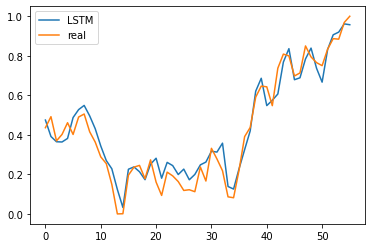

In [216]:
yhat2, ytest2, scaler2 = LSTM_indiv(XOM_df,"XOM")

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 13, 16)            1152      
_________________________________________________________________
lstm_101 (LSTM)              (None, 13, 16)            2112      
_________________________________________________________________
lstm_102 (LSTM)              (None, 13, 16)            2112      
_________________________________________________________________
lstm_103 (LSTM)              (None, 16)                2112      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 4s 221ms/step - loss: 0.5579 - val_loss: 0.3105
Epoch 2/1000
4/4 

Epoch 73/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0544 - val_loss: 0.2265
Epoch 74/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0567 - val_loss: 0.2307
Epoch 75/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0535 - val_loss: 0.2188
Epoch 76/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0516 - val_loss: 0.2491
Epoch 77/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0509 - val_loss: 0.2268
Epoch 78/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0492 - val_loss: 0.2308
Epoch 79/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0485 - val_loss: 0.2158
Epoch 80/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0470 - val_loss: 0.2286
Epoch 81/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0465 - val_loss: 0.2187
Epoch 82/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0458 - val_loss: 0.2203


4/4 [==============================] - 0s 13ms/step - loss: 0.0289 - val_loss: 0.1322
Epoch 155/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0282 - val_loss: 0.1470
Epoch 156/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0348 - val_loss: 0.1078
Epoch 157/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0329 - val_loss: 0.1216
Epoch 158/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0281 - val_loss: 0.1344
Epoch 159/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0261 - val_loss: 0.1204
Epoch 160/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0250 - val_loss: 0.1185
Epoch 161/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0257 - val_loss: 0.1254
Epoch 162/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0257 - val_loss: 0.1254
Epoch 163/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0269 - val_loss: 0.1056
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0951
Epoch 236/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0232 - val_loss: 0.0932
Epoch 237/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0220 - val_loss: 0.0843
Epoch 238/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0219 - val_loss: 0.0888
Epoch 239/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0216 - val_loss: 0.0976
Epoch 240/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0233 - val_loss: 0.0883
Epoch 241/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0843
Epoch 242/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0220 - val_loss: 0.0851
Epoch 243/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0217 - val_loss: 0.0859
Epoch 244/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0848
Epoch

4/4 [==============================] - 0s 16ms/step - loss: 0.0207 - val_loss: 0.0723
Epoch 317/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0222 - val_loss: 0.0745
Epoch 318/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0207 - val_loss: 0.0790
Epoch 319/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0210 - val_loss: 0.0816
Epoch 320/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0207 - val_loss: 0.0829
Epoch 321/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0212 - val_loss: 0.0780
Epoch 322/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0198 - val_loss: 0.0700
Epoch 323/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0729
Epoch 324/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0206 - val_loss: 0.0818
Epoch 325/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0204 - val_loss: 0.0784
Epoch

4/4 [==============================] - 0s 15ms/step - loss: 0.0194 - val_loss: 0.0718
Epoch 398/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0196 - val_loss: 0.0797
Epoch 399/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0199 - val_loss: 0.0745
Epoch 400/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0202 - val_loss: 0.0693
Epoch 401/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0214 - val_loss: 0.0779
Epoch 402/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0201 - val_loss: 0.0784
Epoch 403/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0192 - val_loss: 0.0723
Epoch 404/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0191 - val_loss: 0.0747
Epoch 405/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0189 - val_loss: 0.0777
Epoch 406/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0190 - val_loss: 0.0734
Epoch

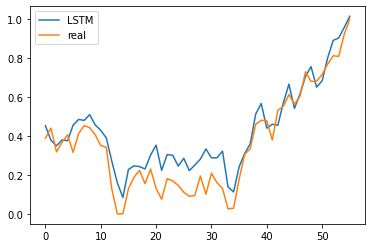

In [217]:
yhat3, ytest3, scaler3 = LSTM_indiv(CVX_df,"CVX")

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 13, 16)            1152      
_________________________________________________________________
lstm_105 (LSTM)              (None, 13, 16)            2112      
_________________________________________________________________
lstm_106 (LSTM)              (None, 13, 16)            2112      
_________________________________________________________________
lstm_107 (LSTM)              (None, 16)                2112      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 3s 225ms/step - loss: 0.5075 - val_loss: 0.3368
Epoch 2/1000
4/4 

Epoch 73/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0462 - val_loss: 0.1709
Epoch 74/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0460 - val_loss: 0.1680
Epoch 75/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0490 - val_loss: 0.1487
Epoch 76/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0493 - val_loss: 0.1850
Epoch 77/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0490 - val_loss: 0.1433
Epoch 78/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0462 - val_loss: 0.1733
Epoch 79/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0453 - val_loss: 0.1464
Epoch 80/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0412 - val_loss: 0.1593
Epoch 81/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0402 - val_loss: 0.1409
Epoch 82/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0422 - val_loss: 0.1583


4/4 [==============================] - 0s 14ms/step - loss: 0.0241 - val_loss: 0.0669
Epoch 155/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0235 - val_loss: 0.0815
Epoch 156/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0288 - val_loss: 0.0663
Epoch 157/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0236 - val_loss: 0.0682
Epoch 158/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0228 - val_loss: 0.0674
Epoch 159/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0232 - val_loss: 0.0671
Epoch 160/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0231 - val_loss: 0.0713
Epoch 161/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0240 - val_loss: 0.0683
Epoch 162/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0231 - val_loss: 0.0673
Epoch 163/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0235 - val_loss: 0.0648
Epoch

4/4 [==============================] - 0s 15ms/step - loss: 0.0198 - val_loss: 0.0574
Epoch 236/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0201 - val_loss: 0.0626
Epoch 237/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0205 - val_loss: 0.0697
Epoch 238/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0216 - val_loss: 0.0572
Epoch 239/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0203 - val_loss: 0.0568
Epoch 240/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0196 - val_loss: 0.0556
Epoch 241/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0199 - val_loss: 0.0593
Epoch 242/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0204 - val_loss: 0.0606
Epoch 243/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0196 - val_loss: 0.0579
Epoch 244/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0196 - val_loss: 0.0608
Epoch

4/4 [==============================] - 0s 14ms/step - loss: 0.0214 - val_loss: 0.0599
Epoch 317/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0227 - val_loss: 0.0735
Epoch 318/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0217 - val_loss: 0.0595
Epoch 319/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0598
Epoch 320/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0644
Epoch 321/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0187 - val_loss: 0.0631
Epoch 322/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0185 - val_loss: 0.0622
Epoch 323/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0192 - val_loss: 0.0675
Epoch 324/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0216 - val_loss: 0.0665
Epoch 325/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0214 - val_loss: 0.0589
Epoch

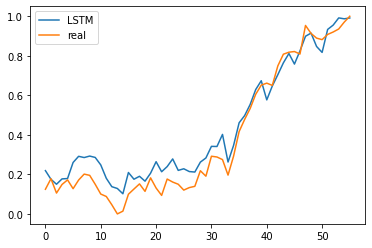

In [218]:
yhat4, ytest4, scaler4 = LSTM_indiv(COP_df,"COP")

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 13, 16)            1152      
_________________________________________________________________
lstm_109 (LSTM)              (None, 13, 16)            2112      
_________________________________________________________________
lstm_110 (LSTM)              (None, 13, 16)            2112      
_________________________________________________________________
lstm_111 (LSTM)              (None, 16)                2112      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 3s 643ms/step - loss: 0.4782 - val_loss: 0.3847
Epoch 2/1000
2/2 

Epoch 73/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0899 - val_loss: 0.1798
Epoch 74/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0878 - val_loss: 0.1929
Epoch 75/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0934 - val_loss: 0.1992
Epoch 76/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0992 - val_loss: 0.1882
Epoch 77/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0892 - val_loss: 0.1688
Epoch 78/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0912 - val_loss: 0.1590
Epoch 79/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.1044 - val_loss: 0.1600
Epoch 80/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.1018 - val_loss: 0.1672
Epoch 81/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0919 - val_loss: 0.1765
Epoch 82/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0882 - val_loss: 0.1816


2/2 [==============================] - 0s 20ms/step - loss: 0.0951 - val_loss: 0.1975
Epoch 155/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0969 - val_loss: 0.1951
Epoch 156/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0945 - val_loss: 0.1857
Epoch 157/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.0885 - val_loss: 0.1714
Epoch 158/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0892 - val_loss: 0.1632
Epoch 159/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0980 - val_loss: 0.1611
Epoch 160/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1015 - val_loss: 0.1616
Epoch 161/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.1007 - val_loss: 0.1647
Epoch 162/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0960 - val_loss: 0.1702
Epoch 163/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0899 - val_loss: 0.1801
Epoch

2/2 [==============================] - 0s 21ms/step - loss: 0.0860 - val_loss: 0.1802
Epoch 236/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0846 - val_loss: 0.1752
Epoch 237/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0855 - val_loss: 0.1728
Epoch 238/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0862 - val_loss: 0.1698
Epoch 239/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0872 - val_loss: 0.1693
Epoch 240/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0874 - val_loss: 0.1738
Epoch 241/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0858 - val_loss: 0.1818
Epoch 242/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0841 - val_loss: 0.1836
Epoch 243/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0842 - val_loss: 0.1801
Epoch 244/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0840 - val_loss: 0.1773
Epoch

2/2 [==============================] - 0s 20ms/step - loss: 0.0843 - val_loss: 0.1775
Epoch 317/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0825 - val_loss: 0.1740
Epoch 318/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0827 - val_loss: 0.1776
Epoch 319/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0822 - val_loss: 0.1834
Epoch 320/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0831 - val_loss: 0.1843
Epoch 321/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0833 - val_loss: 0.1818
Epoch 322/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0823 - val_loss: 0.1796
Epoch 323/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0820 - val_loss: 0.1778
Epoch 324/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0820 - val_loss: 0.1797
Epoch 325/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0818 - val_loss: 0.1874
Epoch

2/2 [==============================] - 0s 21ms/step - loss: 0.0788 - val_loss: 0.1728
Epoch 398/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0812 - val_loss: 0.1680
Epoch 399/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0858 - val_loss: 0.1645
Epoch 400/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0896 - val_loss: 0.1641
Epoch 401/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0896 - val_loss: 0.1639
Epoch 402/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0893 - val_loss: 0.1635
Epoch 403/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0895 - val_loss: 0.1651
Epoch 404/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0871 - val_loss: 0.1710
Epoch 405/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0804 - val_loss: 0.1810
Epoch 406/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0784 - val_loss: 0.1867
Epoch

2/2 [==============================] - 0s 21ms/step - loss: 0.0744 - val_loss: 0.1767
Epoch 479/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0746 - val_loss: 0.1761
Epoch 480/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0745 - val_loss: 0.1750
Epoch 481/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0743 - val_loss: 0.1740
Epoch 482/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0742 - val_loss: 0.1730
Epoch 483/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0743 - val_loss: 0.1696
Epoch 484/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0762 - val_loss: 0.1636
Epoch 485/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0830 - val_loss: 0.1608
Epoch 486/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0861 - val_loss: 0.1651
Epoch 487/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0808 - val_loss: 0.1752
Epoch

2/2 [==============================] - 0s 21ms/step - loss: 0.0721 - val_loss: 0.1614
Epoch 560/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0738 - val_loss: 0.1617
Epoch 561/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0731 - val_loss: 0.1639
Epoch 562/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0707 - val_loss: 0.1687
Epoch 563/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0689 - val_loss: 0.1724
Epoch 564/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0690 - val_loss: 0.1694
Epoch 565/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0682 - val_loss: 0.1661
Epoch 566/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0686 - val_loss: 0.1629
Epoch 567/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0703 - val_loss: 0.1585
Epoch 568/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0740 - val_loss: 0.1591
Epoch

2/2 [==============================] - 0s 21ms/step - loss: 0.0579 - val_loss: 0.1455
Epoch 641/1000
2/2 [==============================] - ETA: 0s - loss: 0.061 - 0s 21ms/step - loss: 0.0615 - val_loss: 0.1541
Epoch 642/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0742 - val_loss: 0.1480
Epoch 643/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0669 - val_loss: 0.1402
Epoch 644/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0562 - val_loss: 0.1377
Epoch 645/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0626 - val_loss: 0.1372
Epoch 646/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0649 - val_loss: 0.1379
Epoch 647/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0545 - val_loss: 0.1421
Epoch 648/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0555 - val_loss: 0.1459
Epoch 649/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0614 

2/2 [==============================] - 0s 21ms/step - loss: 0.0362 - val_loss: 0.1195
Epoch 722/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0434 - val_loss: 0.1179
Epoch 723/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0393 - val_loss: 0.1149
Epoch 724/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0372 - val_loss: 0.1151
Epoch 725/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0501 - val_loss: 0.1141
Epoch 726/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0518 - val_loss: 0.1127
Epoch 727/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0446 - val_loss: 0.1135
Epoch 728/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0371 - val_loss: 0.1168
Epoch 729/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0425 - val_loss: 0.1195
Epoch 730/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0492 - val_loss: 0.1176
Epoch

2/2 [==============================] - 0s 22ms/step - loss: 0.0383 - val_loss: 0.1050
Epoch 803/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0329 - val_loss: 0.1043
Epoch 804/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0351 - val_loss: 0.1040
Epoch 805/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0362 - val_loss: 0.1031
Epoch 806/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0314 - val_loss: 0.1027
Epoch 807/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0301 - val_loss: 0.1021
Epoch 808/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0312 - val_loss: 0.1017
Epoch 809/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0332 - val_loss: 0.1007
Epoch 810/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0317 - val_loss: 0.0992
Epoch 811/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0286 - val_loss: 0.0989
Epoch

2/2 [==============================] - 0s 21ms/step - loss: 0.0421 - val_loss: 0.0926
Epoch 884/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0278 - val_loss: 0.0946
Epoch 885/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0390 - val_loss: 0.0958
Epoch 886/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0451 - val_loss: 0.0936
Epoch 887/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0379 - val_loss: 0.0915
Epoch 888/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0300 - val_loss: 0.0912
Epoch 889/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.0369 - val_loss: 0.0913
Epoch 890/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0417 - val_loss: 0.0908
Epoch 891/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0380 - val_loss: 0.0905
Epoch 892/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0294 - val_loss: 0.0916
Epoch

2/2 [==============================] - 0s 21ms/step - loss: 0.0305 - val_loss: 0.0922
Epoch 965/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0296 - val_loss: 0.0927
Epoch 966/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0308 - val_loss: 0.0931
Epoch 967/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0328 - val_loss: 0.0932
Epoch 968/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0357 - val_loss: 0.0925
Epoch 969/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.0329 - val_loss: 0.0905
Epoch 970/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0298 - val_loss: 0.0912
Epoch 971/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.0380 - val_loss: 0.0905
Epoch 972/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0358 - val_loss: 0.0889
Epoch 973/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0277 - val_loss: 0.0881
Epoch

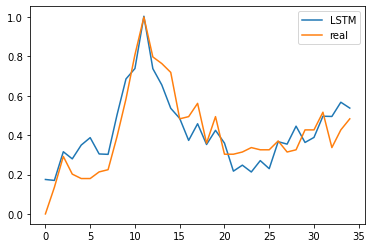

In [219]:
yhat5, ytest5, scaler5 = LSTM_indiv(DVC_df,"DVC")

In [220]:
# 수익률 계산
def return_cal(x,y):
    buy = 0
    n = 0
    for t in range(len(x)-1):
        today = x[t]
        predict = y[t+1]
        if predict > today:
            n+=1
            buy += today
        final_price = x[t]

    aver_purch = buy/n
    r_rate = ((final_price - aver_purch)/aver_purch)*100
    actual_return = (final_price-y[0])/(y[0])*100
    exceed = r_rate - actual_return
    print(aver_purch, final_price,n)
    print('최종 수익률: %.3f \n시장 수익률: %.3f \n추가 수익률: %.3f' % (r_rate, actual_return, exceed))

In [221]:
return_cal(ytest1,yhat1)
return_cal(ytest2,yhat2)
return_cal(ytest3,yhat3)
return_cal(ytest4,yhat4)
return_cal(ytest5,yhat5)

[0.335578] [0.93265993] 36
최종 수익률: 177.926 
시장 수익률: 48.430 
추가 수익률: 129.497
[0.36016187] [0.96852518] 34
최종 수익률: 168.914 
시장 수익률: 104.003 
추가 수익률: 64.911
[0.32774686] [0.92262851] 48
최종 수익률: 181.506 
시장 수익률: 103.702 
추가 수익률: 77.805
[0.32741414] [0.97031383] 47
최종 수익률: 196.357 
시장 수익률: 343.093 
추가 수익률: -146.737
[0.31989425] [0.42696629] 17
최종 수익률: 33.471 
시장 수익률: 143.974 
추가 수익률: -110.503


# 파마 프렌치 모델

In [222]:
import pandas_datareader.data as web
import pandas_datareader.famafrench as ff
import statsmodels.api as smf

In [223]:
test_ff = ff.get_available_datasets()

In [224]:
df_12_industry = [test_fff for test_fff in test_ff if '12_Industry_Portfolios' in test_fff and 'Industry_Portfolios' in test_fff]

In [225]:
ds_industry = web.DataReader(df_12_industry[2],'famafrench', start='2020-01-01', end='2021-10-21')
print(ds_industry)

{0:             NoDur  Durbl  Manuf  Enrgy  Chems  BusEq  Telcm  Utils  Shops  \
Date                                                                        
2020-01-02  -0.73   1.37   1.30   0.94  -1.08   1.83   0.44  -1.31   0.94   
2020-01-03  -0.03  -0.67  -0.24  -0.33  -0.97  -0.81  -0.46   0.20  -0.72   
2020-01-06   0.20   0.23  -0.22   0.82  -0.07   0.70  -0.07   0.21   0.53   
2020-01-07  -0.72   0.43  -0.01  -0.18  -0.55   0.05   0.10  -0.20  -0.20   
2020-01-08   0.42   1.10   0.00  -1.90   0.45   0.88   0.31  -0.26  -0.01   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-09-24  -0.24   1.71  -0.64   0.79  -0.23   0.14  -0.22  -0.11   0.31   
2021-09-27  -0.02   1.90   0.70   3.81  -0.02  -1.05   0.37  -0.56   0.01   
2021-09-28  -1.40  -1.52  -1.66   0.21  -1.06  -3.21  -1.41  -1.15  -2.11   
2021-09-29   0.72   0.18  -0.13   0.06   0.36  -0.33   0.52   1.16   0.24   
2021-09-30  -2.12  -0.96  -1.81  -1.19  -1.49  -0.42  -0.94  -0.93  -1.7

In [226]:
print(ds_industry.keys())
print(ds_industry['DESCR'])

dict_keys([0, 1, 'DESCR'])
12 Industry Portfolios daily
----------------------------

This file was created by CMPT_IND_RETS_DAILY using the 202109 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French

  0 : Average Value Weighted Returns -- Daily (441 rows x 12 cols)
  1 : Average Equal Weighted Returns -- Daily (441 rows x 12 cols)


In [227]:
ds_industry[0].tail()

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Shops,Hlth,Money,Other
Date,,,,,,,,,,,,
2021-09-24,-0.24,1.71,-0.64,0.79,-0.23,0.14,-0.22,-0.11,0.31,-0.91,0.56,0.25
2021-09-27,-0.02,1.90,0.70,3.81,-0.02,-1.05,0.37,-0.56,0.01,-1.10,1.28,0.29
2021-09-28,-1.40,-1.52,-1.66,0.21,-1.06,-3.21,-1.41,-1.15,-2.11,-1.87,-1.64,-1.53
2021-09-29,0.72,0.18,-0.13,0.06,0.36,-0.33,0.52,1.16,0.24,0.42,0.18,-0.12
2021-09-30,-2.12,-0.96,-1.81,-1.19,-1.49,-0.42,-0.94,-0.93,-1.76,-0.61,-1.61,-1.08


## 파마 프렌치 모델 5요인

In [228]:
df_5_factor = [ test_fff for test_fff in test_ff if '5' in test_fff and 'Factor' in test_fff ]

In [229]:
ds_factors = web.DataReader(df_5_factor[1], 'famafrench', start='2020-01-01', end='2021-10-21')
print(ds_factors)

{0:             Mkt-RF   SMB   HML   RMW   CMA     RF
Date                                             
2020-01-02    0.86 -0.97 -0.32  0.24 -0.22  0.006
2020-01-03   -0.67  0.30  0.00 -0.14 -0.11  0.006
2020-01-06    0.36 -0.21 -0.54 -0.17 -0.26  0.006
2020-01-07   -0.19 -0.03 -0.25 -0.13 -0.25  0.006
2020-01-08    0.47 -0.17 -0.65 -0.19 -0.17  0.006
...            ...   ...   ...   ...   ...    ...
2021-09-24    0.08 -0.39  0.70  0.62  0.23  0.000
2021-09-27   -0.10  1.73  2.39 -0.27  0.76  0.000
2021-09-28   -2.18  0.01  1.75  0.84  1.07  0.000
2021-09-29    0.03 -0.18  0.80  1.15  0.35  0.000
2021-09-30   -1.02  0.06 -0.77 -1.23 -0.34  0.000

[441 rows x 6 columns], 'DESCR': 'F-F Research Data 5 Factors 2x3 daily\n-------------------------------------\n\nThis file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.\n\n  0 : (441 rows x 6 cols)'}


In [230]:
print('\nKEYS\n{0}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ds_factors['DESCR']))
ds_factors[0].head()


KEYS
dict_keys([0, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data 5 Factors 2x3 daily
-------------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202109 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.

  0 : (441 rows x 6 cols)


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2020-01-02,0.86,-0.97,-0.32,0.24,-0.22,0.006
2020-01-03,-0.67,0.30,0.00,-0.14,-0.11,0.006
2020-01-06,0.36,-0.21,-0.54,-0.17,-0.26,0.006
2020-01-07,-0.19,-0.03,-0.25,-0.13,-0.25,0.006
2020-01-08,0.47,-0.17,-0.65,-0.19,-0.17,0.006


In [231]:
dfAsset = ds_industry[0].copy()/100
dfFactor = ds_factors[0].copy()/100

## Enrgy 파마 프렌치 모델

In [232]:
dfXsAsset = dfAsset.sub(dfFactor['RF'],axis=0)
dfXsAsset.head()
Enrgy = dfXsAsset.Enrgy
Enrgy = pd.DataFrame(Enrgy)
Enrgy = Enrgy.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
Enrgy

,Enrgy,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2020-01-02,0.00934,0.0086,-0.0097,-0.0032,0.0024,-0.0022,0.00006
2020-01-03,-0.00336,-0.0067,0.0030,0.0000,-0.0014,-0.0011,0.00006
2020-01-06,0.00814,0.0036,-0.0021,-0.0054,-0.0017,-0.0026,0.00006
2020-01-07,-0.00186,-0.0019,-0.0003,-0.0025,-0.0013,-0.0025,0.00006
2020-01-08,-0.01906,0.0047,-0.0017,-0.0065,-0.0019,-0.0017,0.00006
...,...,...,...,...,...,...,...
2021-09-24,0.00790,0.0008,-0.0039,0.0070,0.0062,0.0023,0.00000
2021-09-27,0.03810,-0.0010,0.0173,0.0239,-0.0027,0.0076,0.00000
2021-09-28,0.00210,-0.0218,0.0001,0.0175,0.0084,0.0107,0.00000


In [233]:
Enrgy.rename(columns={"Mkt-RF" : "mkt_excess"}, inplace=True)

In [234]:
model = smf.formula.ols(formula = "Enrgy ~ mkt_excess + SMB + HML + RMW + CMA", data = Enrgy).fit( )

In [235]:
print(model.params)
print(model.summary())

Intercept    -0.000151
mkt_excess    1.116874
SMB           0.204168
HML           1.072228
RMW          -0.606373
CMA           0.249723
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Enrgy   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     282.0
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          5.49e-134
Time:                        15:38:32   Log-Likelihood:                 1216.2
No. Observations:                 441   AIC:                            -2420.
Df Residuals:                     435   BIC:                            -2396.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

In [236]:
intercept, b1, b2, b3, b4, b5 = model.params

rf = Enrgy['RF'].mean()
market_premium = Enrgy['mkt_excess'].mean()
size_premium = Enrgy['SMB'].mean()
value_premium = Enrgy['HML'].mean()
RMW_Enrgy = Enrgy['RMW'].mean()
CMA_Enrgy = Enrgy['CMA'].mean()

expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW_Enrgy + b5 * CMA_Enrgy 
expected_yearly_return = expected_daily_return * 66
print("Expected yearly return: " + str(expected_yearly_return))

Expected yearly return: 0.044199028346069


## 회사 파마 프렌치 모델

In [237]:
def df_model(ticker, start, end):
    ds_factors = web.DataReader(df_5_factor[1], 'famafrench', start=start, end=end)
    dfFactor = ds_factors[0].copy()/100
    df_price = fdr.DataReader(ticker, start, end)
    df_price = df_price['Close']
    df_price = pd.DataFrame(df_price)
    df_price[ticker] = df_price.Close.pct_change(periods = 1)
    df_price = df_price.drop('Close',axis=1)
    df_price = df_price.sub(dfFactor['RF'], axis=0)
    df_price = df_price.merge(dfFactor, how = 'inner', left_index = True, right_index = True)
    df_price = df_price.fillna(0)
    df_price.rename(columns={"Mkt-RF":"mkt_excess"}, inplace=True)
    name = df_price.columns[0]
    df_price_model = smf.formula.ols(formula = f"{name} ~ mkt_excess + SMB + HML + RMW + CMA", data = df_price).fit( )
    print(df_price)
    print(df_price_model.params)
    print(df_price_model.summary())
    return df_price_model.params, df_price

In [238]:
# 수익률 계산식은 아직 조금더 추가 자료가 필요함
def Calcul(ticker, start, end):
    params, df_price = df_model(ticker, start, end)
    intercept, b1, b2, b3, b4, b5 = params

    rf = df_price['RF'].mean()
    market_premium = df_price['mkt_excess'].mean()
    size_premium = df_price['SMB'].mean()
    value_premiumO = df_price['HML'].mean()
    RMW = df_price['RMW'].mean()
    CMA = df_price['CMA'].mean()

    expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium + b4 * RMW + b5 * CMA
    expected_yearly_return = expected_daily_return * 66
    print("Expected yearly return: " + str(expected_yearly_return))

In [239]:
Calcul("DVN", "2020-01-01", "2021-07-31")

                 DVN  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03  0.012008     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06  0.011864      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07  0.003082     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.035690      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.040203      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.026642     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.020046      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.006425      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.029666     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept     

In [240]:
Calcul("XOM", "2020-01-01", "2021-07-31")

                 XOM  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03 -0.008099     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06  0.007618      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07 -0.008244     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.015140      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.025245      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.011115     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.006744      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.012195      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.023078     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept    -

In [241]:
Calcul("MRO", "2020-01-01", "2021-07-31")

                 MRO  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03  0.005057     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06  0.015213      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07 -0.012238     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.037043      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.028696      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.038884     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.036060      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.002547      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.018628     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept     

In [242]:
Calcul("CVX", "2020-01-01", "2021-07-31")

                 CVX  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03 -0.003519     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06 -0.003448      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07 -0.012829     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.011483      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.021141      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.003368     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.005665      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.013738      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.007410     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept    -

In [243]:
Calcul("COP", "2020-01-01", "2021-07-31")

                 COP  mkt_excess     SMB     HML     RMW     CMA       RF
Date                                                                     
2020-01-02  0.000000      0.0086 -0.0097 -0.0032  0.0024 -0.0022  0.00006
2020-01-03  0.003606     -0.0067  0.0030  0.0000 -0.0014 -0.0011  0.00006
2020-01-06  0.011812      0.0036 -0.0021 -0.0054 -0.0017 -0.0026  0.00006
2020-01-07 -0.000060     -0.0019 -0.0003 -0.0025 -0.0013 -0.0025  0.00006
2020-01-08 -0.023225      0.0047 -0.0017 -0.0065 -0.0019 -0.0017  0.00006
...              ...         ...     ...     ...     ...     ...      ...
2021-07-26  0.027647      0.0018  0.0011  0.0133  0.0024  0.0087  0.00000
2021-07-27 -0.009495     -0.0066 -0.0046  0.0060  0.0046  0.0010  0.00000
2021-07-28  0.006923      0.0027  0.0121 -0.0065 -0.0157 -0.0072  0.00000
2021-07-29  0.006347      0.0041  0.0022  0.0095  0.0080  0.0054  0.00000
2021-07-30 -0.017870     -0.0065 -0.0010 -0.0017  0.0056  0.0040  0.00000

[398 rows x 7 columns]
Intercept    -